In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from src.encoders_decoders import *
from src.losses import *
from torch.utils.data import DataLoader
import itertools
import random

In [2]:
#Architecture parameters and distributions of stimuli
N = 10
K = 10
p_x = torch.distributions.uniform.Uniform(-10,10)

#Training parameters
N_EPOCHS = 5000
N_SAMPLES = 500
lr = 1e-2
BATCH_SIZE = 500

#Generate samples
x_samples = p_x.sample((N_SAMPLES,))[:,None]
x_sorted,indices = x_samples.sort(dim=0)
x_min,x_max = x_sorted[0,:].item(),x_sorted[-1,:].item()
x_data = torch.utils.data.DataLoader(x_samples,batch_size=BATCH_SIZE)
x_fine = torch.linspace(x_min,x_max,1000)[:,None]

In [20]:
#Initialization of encoder and decoder 
enc = BernoulliEncoder(N,x_min-0.2,x_max+0.2,x_sorted)
r = enc.sample(x_fine,100)
r_all = np.asarray(list(itertools.product([0, 1], repeat=N)))
r_all = torch.tensor(r_all).transpose(0,1).type(torch.float)

In [22]:
q = rate_ising(N)
q.J.register_hook(lambda grad: grad.fill_diagonal_(0))
params = itertools.chain(enc.parameters(),q.parameters())
lr = 1e-3
opt = torch.optim.Adam(params,lr)
lVec = []
for n in range(10000):
    loss = q(enc,x_fine)
    opt.zero_grad()
    loss.backward()
    opt.step()
    lVec.append(loss.item())


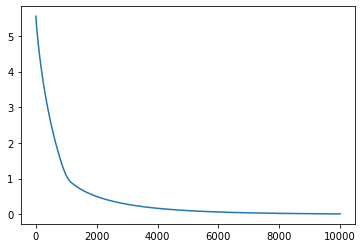

In [23]:
plt.plot(lVec)

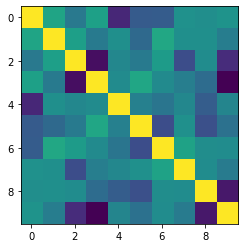

In [24]:
plt.imshow(q.J.detach(),vmin=q.J.min().item(),vmax=q.J.max().item())

Text(0, 0.5, 'Encoding')

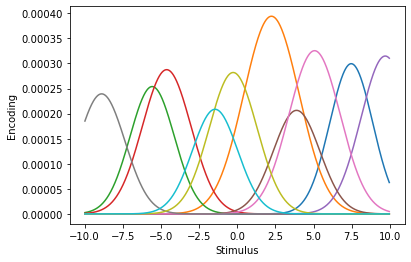

In [25]:
plt.plot(x_fine,torch.sigmoid(enc(x_fine)).detach())
plt.xlabel("Stimulus")
plt.ylabel("Encoding")

In [74]:
np.save('myspikes.npy',rTA.numpy())

In [34]:
r= enc.sample(x_fine,10)
r.mean(dim=1).sum()

torch.Size([1000, 10])

In [8]:
r_all.shape

(1024, 10)